# Task 33-> Neural Networks Basics (Perceptron, Activation Functions)
Neural networks are computational models inspired by the human brain's structure and function. They consist of layers of interconnected units called neurons, which work together to process inputs and produce outputs. The core concept of a neural network is to learn patterns in data through training. During training, the network adjusts the connections (weights) between neurons to minimize the difference between predicted and actual outputs.<br><br>

## Structure of a Neural Network

A basic neural network includes the following layers:

### 1. Input Layer: 
This layer receives the initial data. Each neuron in this layer represents a feature or attribute of the data.

### 2. Hidden Layer(s): 
These layers process the input data through weighted connections. The number of hidden layers and neurons within each layer can vary depending on the task's complexity.

### 3. Output Layer: 
This layer provides the final prediction or classification. For regression tasks, this usually consists of a single neuron that represents the predicted value.<br><br>

## Perceptron

### Perceptron Model

The perceptron is the simplest type of neural network and serves as the foundation for more complex networks. It consists of a single neuron that:

Takes multiple input features (e.g.,x1, x2,x3,......,xn).
Computes a weighted sum of these inputs: 
<br>
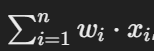

<br> where wi are the weights associated with each input.
Applies an activation function to the weighted sum to produce an output.

Mathematically, the perceptron can be expressed as:<br>
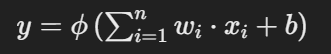
<br>
where ϕ is the activation function and b is the bias term.

## Importing Necessary Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Data Preprocessing

In [2]:
# Reading dataset
df = pd.read_csv('/kaggle/input/dataset-porter/dataset.csv')

## First 5 rows of dataset

In [3]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


## Info of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

## Description of Dataset

In [5]:
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


## Checking for missing values

In [6]:
print("Missing values in the dataset:\n",df.isnull().sum())

Missing values in the dataset:
 market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64


## Handling Missing values

In [7]:
# Handling missing values by dropping rows with any NaN values
df = df.dropna()

## Standardizing Data

In [8]:
# Normalizing the data
scaler = MinMaxScaler()
df[['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price']] = scaler.fit_transform(
    df[['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price']]
)

## Selecting features and target

In [9]:
X = df[['total_items', 'num_distinct_items', 'min_item_price', 'max_item_price']].values
y = df['subtotal'].values.reshape(-1, 1)

## Splitting Data

In [10]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Neural Network Implementation


In [11]:
# Initialize weights and biases
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1
learning_rate = 0.01

## Weights and Biases

In [12]:
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Activation functions
Activation functions introduce non-linearity into the network, enabling it to learn complex patterns. Without activation functions, a neural network would behave like a linear model, no matter how many layers it has.
<br>
Common activation functions include:
<br>
## 1. Sigmoid:

#### Formula: <br>
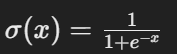<br>
#### Output Range: 
(0, 1)
#### Pros: 
Useful for binary classification tasks as it maps outputs to a range between 0 and 1.
#### Cons: 
Prone to vanishing gradients, making learning difficult during backpropagation.

In [13]:
# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 2. Hyperbolic Tangent (Tanh):

#### Formula: <br>
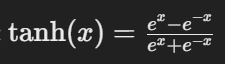
 <br>
#### Output Range: 
(-1, 1)
#### Pros: 
Zero-centered output, leading to faster convergence during training.
#### Cons: 
Also suffers from vanishing gradients, though less so than the sigmoid function.

In [14]:
# tangent-hyperbolic activation function
def tanh(x):
    return np.tanh(x)

# 3. ReLU (Rectified Linear Unit):

#### Formula: 
#### ReLU(x)=max(0,x)<br>
#### Output Range: 
[0, ∞)
#### Pros: 
Solves the vanishing gradient problem, allowing for faster and more effective training.
#### Cons: 
Can lead to "dead neurons" where some neurons stop activating during training.


In [15]:
# RELU activation function
def relu(x):
    return np.maximum(0, x)

# 4. Leaky ReLU:

#### Formula: 
#### Leaky ReLU(x)=max(αx,x) 
where α is a small constant (e.g., 0.01)<br>
#### Output Range: 
(-∞, ∞)
#### Pros: 
Addresses the issue of dead neurons in ReLU by allowing a small, non-zero gradient for negative inputs.

In [16]:
# leaky_RELU activation function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

## Mean Squared Error (MSE)
For regression tasks, the Mean Squared Error (MSE) is a commonly used loss function. It measures the average squared difference between actual target values and predicted values.

The MSE is defined as:<br>
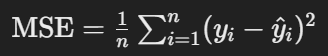
<br>
where:<br>
yi is the actual value.<br>
yi^ is the predicted value.<br>
n is the number of data points.<br>
MSE is advantageous for regression tasks because it penalizes larger errors more than smaller ones, aiding in producing more accurate predictions.

In [17]:
# Mean Squared Error loss
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Backpropagation

Backpropagation is the algorithm used to compute the gradients of the loss function with respect to each weight in the network. It involves two main steps:

## 1. Forward Pass: 
Calculate the network's output for a given input.

In [18]:
def forward(X, activation_function):
    z1 = np.dot(X, W1) + b1
    if activation_function == 'sigmoid':
        a1 = sigmoid(z1)
    elif activation_function == 'tanh':
        a1 = tanh(z1)
    elif activation_function == 'relu':
        a1 = relu(z1)
    elif activation_function == 'leaky_relu':
        a1 = leaky_relu(z1)
    z2 = np.dot(a1, W2) + b2
    return z2, a1

## 2. Backward Pass: 
Compute the gradient of the loss with respect to each weight by applying the chain rule of calculus, starting from the output layer and moving backward through the network.

In [19]:
def backward(X, y, a1, y_pred, activation_function):
    global W1, b1, W2, b2
    m = X.shape[0]
    
    dz2 = y_pred - y
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    
    if activation_function == 'sigmoid':
        da1 = a1 * (1 - a1)
    elif activation_function == 'tanh':
        da1 = 1 - np.square(a1)
    elif activation_function == 'relu':
        da1 = np.where(a1 > 0, 1, 0)
    elif activation_function == 'leaky_relu':
        da1 = np.where(a1 > 0, 1, 0.01)
    
    dz1 = np.dot(dz2, W2.T) * da1
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

## Training the network


In [20]:
def train(X, y, activation_function, epochs=1000):
    losses = []
    for epoch in range(epochs):
        y_pred, a1 = forward(X, activation_function)
        loss = mse(y, y_pred)
        losses.append(loss)
        backward(X, y, a1, y_pred, activation_function)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    return losses

## Loss curves for activation function


In [21]:
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

Training with sigmoid activation function.
Epoch 0, Loss: 1.5707826450004685
Epoch 100, Loss: 0.006497234313859118
Epoch 200, Loss: 0.005648386438549721
Epoch 300, Loss: 0.005620400511258014
Epoch 400, Loss: 0.005593137591677468
Epoch 500, Loss: 0.005566152380966134
Epoch 600, Loss: 0.005539440885439901
Epoch 700, Loss: 0.005512999410711464
Epoch 800, Loss: 0.005486824322831857
Epoch 900, Loss: 0.005460912047018379


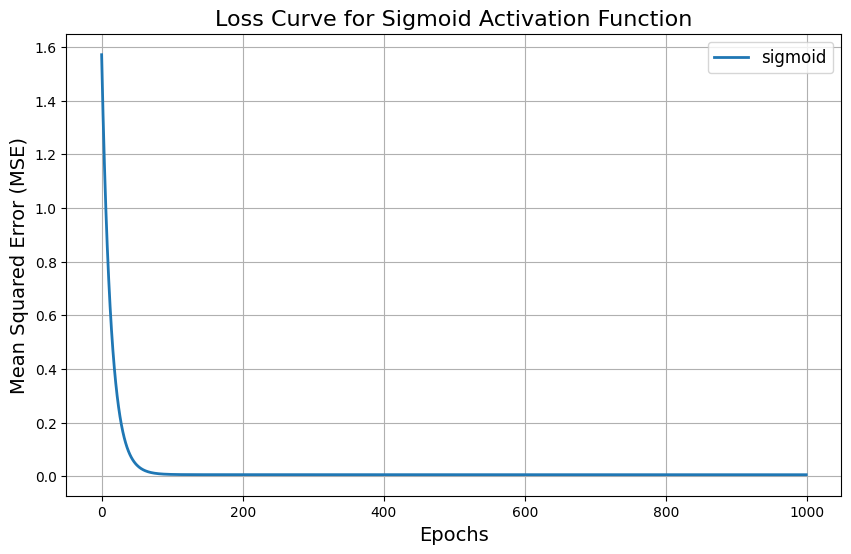

Training with tanh activation function.
Epoch 0, Loss: 1.3734534789393125
Epoch 100, Loss: 0.07441022799943106
Epoch 200, Loss: 0.06303293482160884
Epoch 300, Loss: 0.053852837217842564
Epoch 400, Loss: 0.046394731482401794
Epoch 500, Loss: 0.04029754888420769
Epoch 600, Loss: 0.03528379327073787
Epoch 700, Loss: 0.031138097253106047
Epoch 800, Loss: 0.02769187957521808
Epoch 900, Loss: 0.024812194044156865


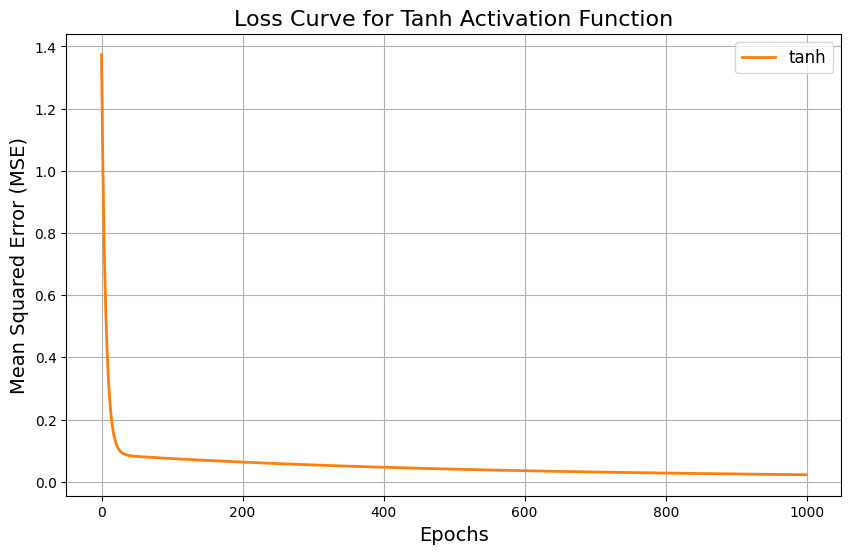

Training with relu activation function.
Epoch 0, Loss: 0.02084063245587286
Epoch 100, Loss: 0.006795856403451616
Epoch 200, Loss: 0.005354422147648852
Epoch 300, Loss: 0.005098072205299617
Epoch 400, Loss: 0.004989456434625238
Epoch 500, Loss: 0.004910778030660042
Epoch 600, Loss: 0.00484597928189857
Epoch 700, Loss: 0.0047894407182998006
Epoch 800, Loss: 0.004736974019295679
Epoch 900, Loss: 0.004684754367730797


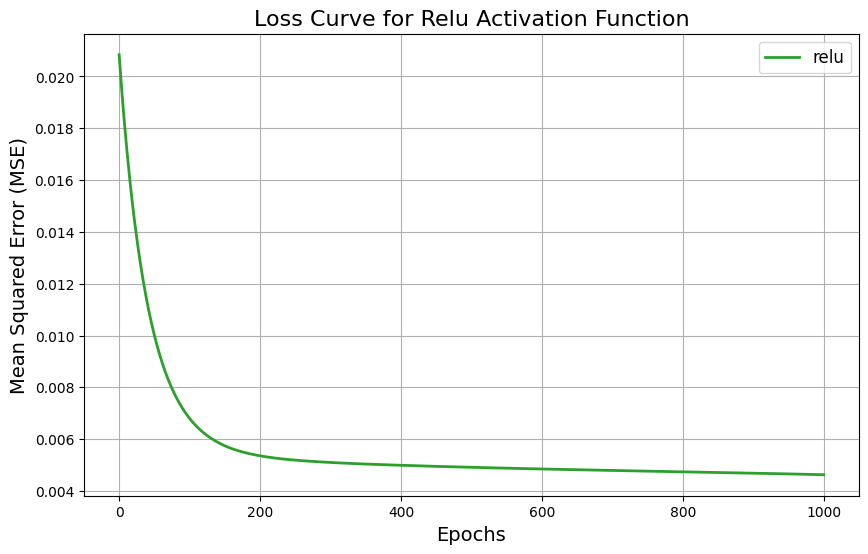

Training with leaky_relu activation function.
Epoch 0, Loss: 0.004478446337661138
Epoch 100, Loss: 0.004383807599039542
Epoch 200, Loss: 0.004169665058663693
Epoch 300, Loss: 0.003972198647420236
Epoch 400, Loss: 0.003834772000066123
Epoch 500, Loss: 0.003737262127998001
Epoch 600, Loss: 0.003666441385817868
Epoch 700, Loss: 0.0036133713489951975
Epoch 800, Loss: 0.003572438738733857
Epoch 900, Loss: 0.003539605076227496


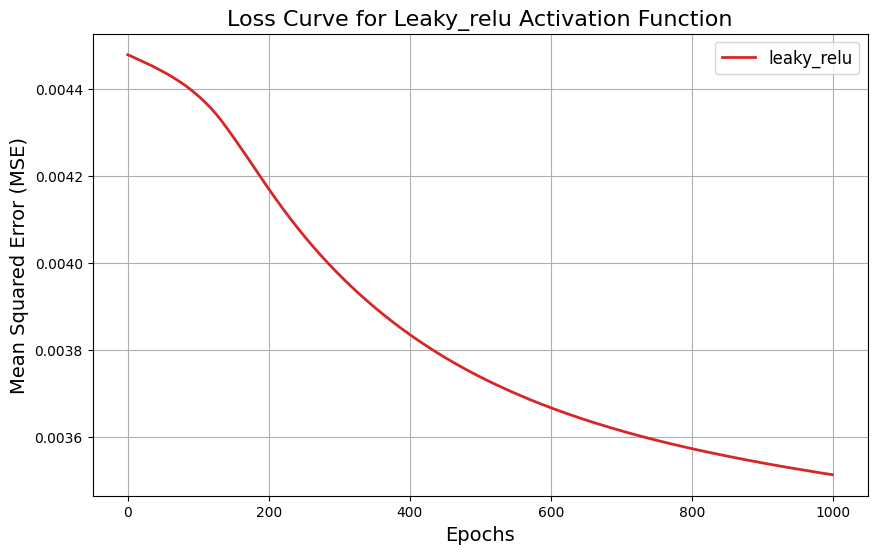

In [22]:
for i, activation_function in enumerate(activation_functions):
    print(f"Training with {activation_function} activation function.")
    losses = train(X_train, y_train, activation_function)
    
    # Create a plot for each activation function
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label=f'{activation_function}', color=colors[i], linewidth=2)
    plt.title(f'Loss Curve for {activation_function.capitalize()} Activation Function', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(True)
    plt.show()

# 3. Evaluate on Test Data

In [25]:
def evaluate(X_test, y_test, activation_function):
    y_pred, _ = forward(X_test, activation_function)
    test_loss = mse(y_test, y_pred)
    print(f"Test Loss with {activation_function}: {test_loss}")
    return y_pred

## Predicted vs Actual values for each activation function


Test Loss with sigmoid: 0.00415327218172756


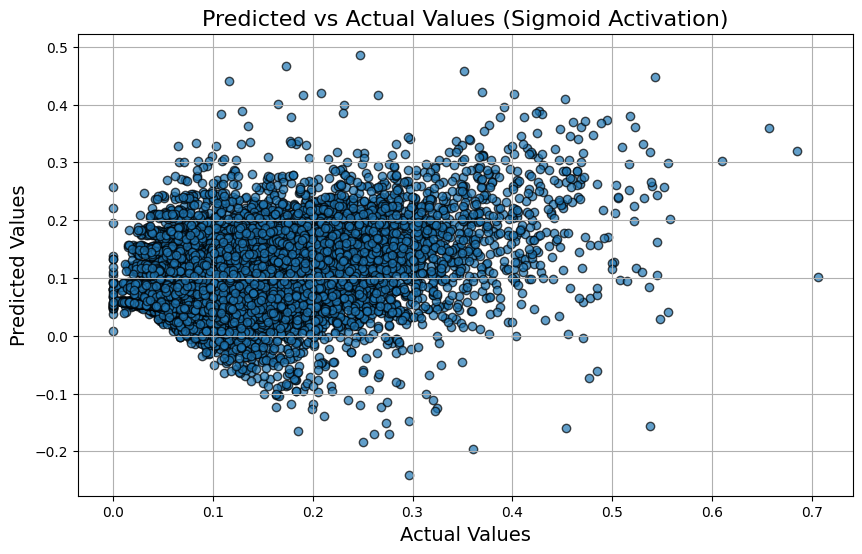

Test Loss with tanh: 0.09831865030277732


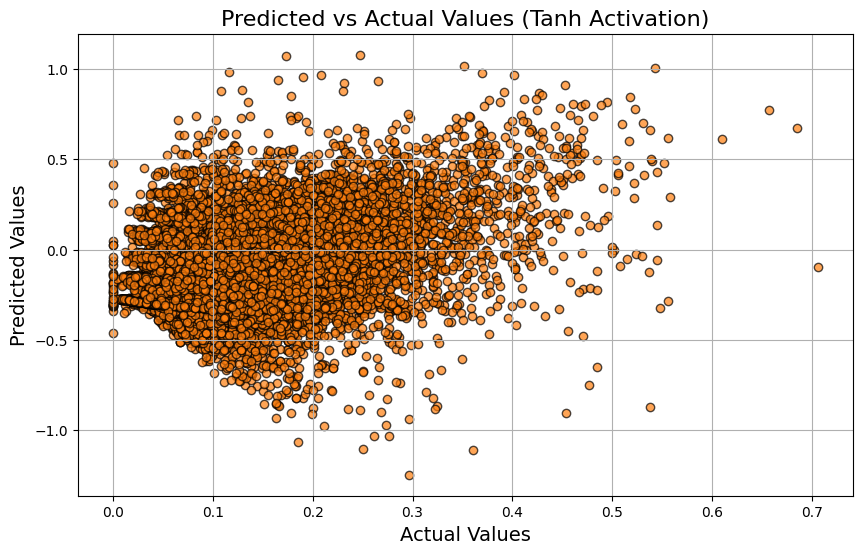

Test Loss with relu: 0.003618611470244902


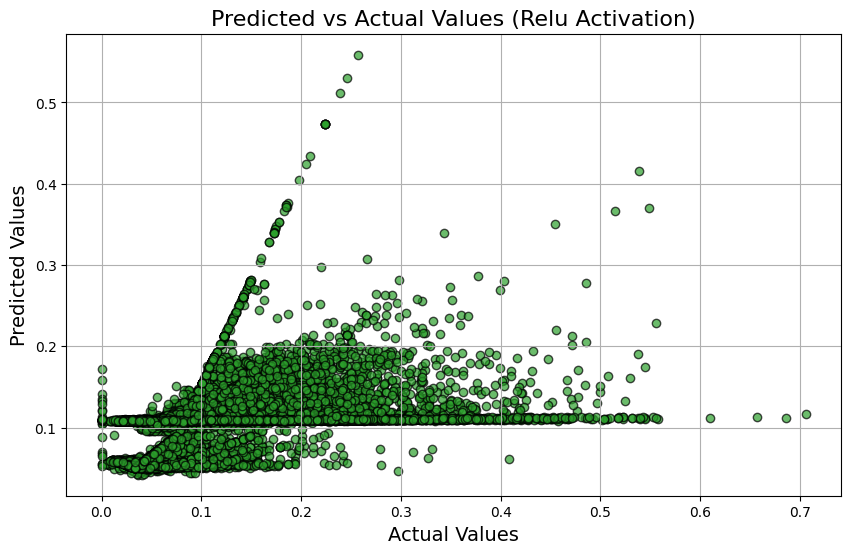

Test Loss with leaky_relu: 0.003518888363421594


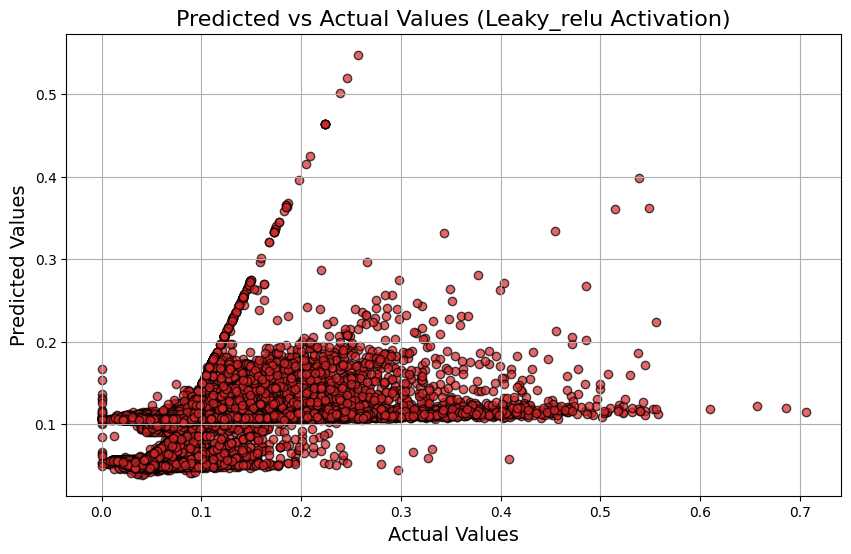

In [26]:
for i, activation_function in enumerate(activation_functions):
    y_pred = evaluate(X_test, y_test, activation_function)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color=colors[i], alpha=0.7, edgecolor='k')
    plt.title(f'Predicted vs Actual Values ({activation_function.capitalize()} Activation)', fontsize=16)
    plt.xlabel('Actual Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.grid(True)
    plt.show()